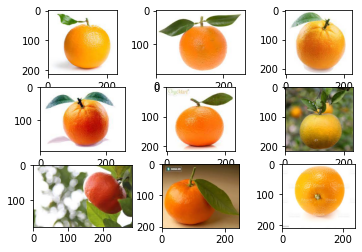

In [4]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Colab Notebooks/Anh/TraiCay_1/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+ 'Cam_'+str(i + 1) +'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [5]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import load_img, img_to_array

folder ='/content/drive/MyDrive/Colab Notebooks/Anh/TraiCay_1/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('Cam'):
    output = 0
    photo = load_img(folder+ file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Dau'):
    output = 1
    photo = load_img(folder + file, target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Duahau'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Khe'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Mangcau'):
    output = 4
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Mangcauxiem'):
    output = 5
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Mit'):
    output = 6
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Oi'):
    output = 7
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Tao'):
    output = 8
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Xoai'):
    output = 9
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10fruits_photos.npy', photos)
save('10fruits_labels.npy', labels)

(236, 150, 150, 3) (236,)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

#Biên dịch
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Training
history = model.fit(photos, labels, epochs= 30, verbose=1)

Epoch 1/30
8/8 [==============================] - 10s 1s/step - loss: 2286.8179 - accuracy: 0.1229
Epoch 2/30
8/8 [==============================] - 10s 1s/step - loss: 84.8973 - accuracy: 0.2076
Epoch 3/30
8/8 [==============================] - 10s 1s/step - loss: 5.2676 - accuracy: 0.3814
Epoch 4/30
8/8 [==============================] - 10s 1s/step - loss: 1.8041 - accuracy: 0.4873
Epoch 5/30
8/8 [==============================] - 10s 1s/step - loss: 1.2623 - accuracy: 0.6059
Epoch 6/30
8/8 [==============================] - 10s 1s/step - loss: 1.0282 - accuracy: 0.7288
Epoch 7/30
8/8 [==============================] - 10s 1s/step - loss: 0.8891 - accuracy: 0.7924
Epoch 8/30
8/8 [==============================] - 10s 1s/step - loss: 0.7677 - accuracy: 0.7627
Epoch 9/30
8/8 [==============================] - 10s 1s/step - loss: 0.5773 - accuracy: 0.8178
Epoch 10/30
8/8 [==============================] - 10s 1s/step - loss: 0.4889 - accuracy: 0.8390
Epoch 11/30
8/8 [==================

In [8]:
model.save('NhanDangTraiCay_CNN.h5')

In [9]:
classes = ["Cam","Dau","Duahau","Khe","Mangcau","Mangcauxiem","Mit","Oi","Tao","Xoai"]

[[0.10595062 0.08730137 0.14574389 0.07844528 0.08094444 0.09494727
  0.0842295  0.10046778 0.1162413  0.10572852]]


'Duahau'

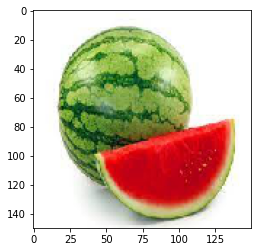

In [15]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import numpy as np
img = load_img('Duahau_111.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255
y_pred = model.predict(img)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.09481986 0.0934173  0.10588456 0.09929857 0.1009569  0.10051652
  0.11025472 0.0997595  0.09955484 0.09553718]]


'Mit'

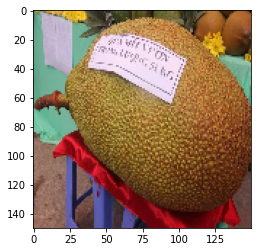

In [20]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import numpy as np
img = load_img('Mit_555.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255
y_pred = model.predict(img)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.10147376 0.11135345 0.10068917 0.09000414 0.09516367 0.09102456
  0.09457677 0.10778493 0.10715911 0.10077053]]


'Dau'

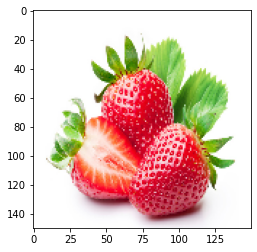

In [21]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import numpy as np
img = load_img('Dau_000.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255
y_pred = model.predict(img)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]